In [37]:
import pandas as pd 
from surprise import Dataset, Reader
from surprise.model_selection import \
    train_test_split, GridSearchCV, cross_validate
from surprise import accuracy
import numpy as np
from surprise.similarities import cosine
from surprise.prediction_algorithms.knns import \
    KNNBasic, KNNWithMeans, KNNWithZScore
from surprise import SVD,SlopeOne
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [8]:
# Laod data
data=pd.read_csv('data.csv')
df=data[['user_id','item_id','recommend']]

In [9]:
# Convert df into Surprise object
reader=Reader(rating_scale=(0,1))
data=Dataset.load_from_df(df,reader=reader)

In [10]:
# Split data into training and testing set
trainset, testset = train_test_split(data, test_size=0.3)

In [11]:
print('Number of users: ', trainset.n_users, '\n')
print('Number of items: ', trainset.n_items, '\n')

Number of users:  18875 

Number of items:  2554 



In [43]:
# Compute RMSE of KNNBasic
my_sim_option={'name':'cosine','user_based':False}
algo=KNNBasic(sim_option=my_sim_option)
algo.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [44]:
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.3129


0.312882663858023

In [21]:
# KNNWithMeans
algo=KNNWithMeans(k=my_k,min_k=my_min_k,sim_option=my_sim_option)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3355


0.33549838575662344

In [22]:
# KNNWithZScore
algo=KNNWithZScore(k=my_k,min_k=my_min_k,sim_option=my_sim_option)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.3360


0.3360057796492116

In [14]:
# Compute RMSE of SVD
algo=SVD()
algo.fit(trainset)

In [15]:
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.2920


0.292010475735039

In [16]:
# Compute RMSE of SlopeOne
algo=SlopeOne()
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.3394


0.3394398071037379

In [45]:
# Put results in a dataframe
model_score={
    'KNNBasic':0.3129,
    'KNNWithMeans':0.3355,
    'KNNWithZScore':0.3360,
    'SVD':0.2920,
    'SlopeOne':0.3394
}
models_rmse=pd.DataFrame(model_score.items(),columns=['Models','RMSE'])

Text(0.5, 1.0, 'RMSE of Each Models')

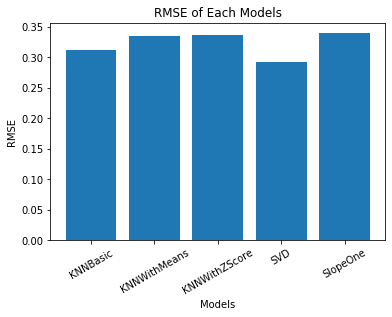

In [46]:
# Plot the results
plt.bar(x='Models',height='RMSE',data=models_rmse)
plt.xticks(rotation=30)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE of Each Models')